In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('./src')

In [4]:
from gymnasium.wrappers import TimeLimit, TransformReward, FrameStackObservation
from env_hiv import HIVPatient
# from train import LatestActionWrapper
env = TimeLimit(
    env=HIVPatient(domain_randomization=False), max_episode_steps=200
)  # The time wrapper limits the number of steps in an episode at 200.
# Now is the floor is yours to implement the agent and train it.
env = TransformReward(env, lambda reward: reward / 50000.0)
# env = LatestActionWrapper(env)
env.observation_space.shape

(6,)

In [3]:
from stable_baselines3 import PPO

model = PPO("MlpPolicy", env, verbose=1, device="cuda")
model.learn(total_timesteps=1000, progress_bar=True)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Output()

c:\Users\Travail\Documents\mva\mva-rl-assignment-Butanium\.venv\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | 1.09e+07 |
| time/              |          |
|    fps             | 27       |
|    iterations      | 1        |
|    time_elapsed    | 74       |
|    total_timesteps | 2048     |
---------------------------------


In [4]:
model.save("ppo_hiv")

In [6]:
# show observation space
print(env.observation_space)

# show action space
print(env.action_space)

Box(-inf, inf, (6,), float32)
Discrete(4)


In [18]:
obs = env.reset()
done = False
truncated = False
total_reward = 0
all_rewards = []
while not done and not truncated:
    action = env.action_space.sample()
    (observation, reward, terminated, truncated, info) = env.step(action)
    total_reward += reward
    all_rewards.append(reward)
    print(f"Step reward: {reward}")

print(f"Total reward: {total_reward}")

Step reward: 0.15616200000000005
Step reward: 0.4670686790129542
Step reward: 0.6156369136544797
Step reward: 0.5650563789846207
Step reward: 0.5356909988186735
Step reward: 0.508250167950064
Step reward: 0.1372176912729389
Step reward: 0.2994209896881207
Step reward: 0.20230615387938314
Step reward: 0.39457929615930715
Step reward: 0.5656713392489515
Step reward: 0.47549696487484283
Step reward: 0.5103845472700486
Step reward: 0.44072020571190396
Step reward: 0.2929963038491058
Step reward: 0.5038333264413802
Step reward: 0.7218345749387398
Step reward: 1.105401825463595
Step reward: 1.0292132101509863
Step reward: 1.0629336101197038
Step reward: 1.543739993645836
Step reward: 0.7130316561158604
Step reward: 0.9962962083296766
Step reward: 0.9228145344350193
Step reward: 1.3275276306231838
Step reward: 0.7555330503086567
Step reward: 0.9058889378235162
Step reward: 0.8901609623114517
Step reward: 1.1520012959705743
Step reward: 1.0313122225099212
Step reward: 0.5093962269642
Step rewa

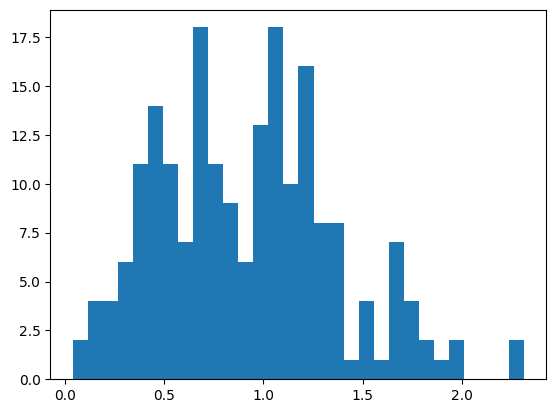

In [19]:
import matplotlib.pyplot as plt
plt.hist(all_rewards, bins=30)  # Increased the number of bins for better granularity
plt.show()

In [5]:
from wandb.integration.sb3 import WandbCallback
from sb3_contrib import RecurrentPPO
import wandb
from gymnasium.wrappers import TimeLimit, TransformReward
from env_hiv import HIVPatient

env = TimeLimit(
    env=HIVPatient(domain_randomization=True), max_episode_steps=200
)  # The time wrapper limits the number of steps in an episode at 200.
# Now is the floor is yours to implement the agent and train it.
env = TransformReward(env, lambda reward: reward / 50000.0)

name = "lstm_test_ft_rnd"
wandb.init(project="mva-rl-assignment-Butanium", name=name, sync_tensorboard=True)
model = RecurrentPPO("MlpLstmPolicy", env, tensorboard_log=f"logs/{name}")
# model.load("models/ppo_hiv_lstm")
try:
    model.learn(total_timesteps=10000, progress_bar=True, callback=WandbCallback())
finally:
    model.save("models/ppo_hiv_lstm_ft_rnd_training_from_scratch")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Output()

----------------------------
| time/              |     |
|    fps             | 27  |
|    iterations      | 1   |
|    time_elapsed    | 4   |
|    total_timesteps | 128 |
----------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 213           |
| time/                   |               |
|    fps                  | 22            |
|    iterations           | 2             |
|    time_elapsed         | 11            |
|    total_timesteps      | 256           |
| train/                  |               |
|    approx_kl            | 0.00095634395 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.39         |
|    explained_variance   | -0.0507       |
|    learning_rate        | 0.0003        |
|    loss                 | 69.2          |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.00316      |
|    value_loss           | 152           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 213           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 3             |
|    time_elapsed         | 17            |
|    total_timesteps      | 384           |
| train/                  |               |
|    approx_kl            | 0.00025083916 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.38         |
|    explained_variance   | -0.00786      |
|    learning_rate        | 0.0003        |
|    loss                 | 130           |
|    n_updates            | 20            |
|    policy_gradient_loss | 6.06e-05      |
|    value_loss           | 274           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 201           |
| time/                   |               |
|    fps                  | 22            |
|    iterations           | 4             |
|    time_elapsed         | 22            |
|    total_timesteps      | 512           |
| train/                  |               |
|    approx_kl            | 0.00027624704 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.38         |
|    explained_variance   | 0.0133        |
|    learning_rate        | 0.0003        |
|    loss                 | 113           |
|    n_updates            | 30            |
|    policy_gradient_loss | -0.000986     |
|    value_loss           | 239           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 176           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 5             |
|    time_elapsed         | 29            |
|    total_timesteps      | 640           |
| train/                  |               |
|    approx_kl            | 0.00088037597 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.38         |
|    explained_variance   | 0.00462       |
|    learning_rate        | 0.0003        |
|    loss                 | 21.3          |
|    n_updates            | 40            |
|    policy_gradient_loss | -0.00256      |
|    value_loss           | 47.7          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 176          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 6            |
|    time_elapsed         | 35           |
|    total_timesteps      | 768          |
| train/                  |              |
|    approx_kl            | 0.0021502315 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | 0.0135       |
|    learning_rate        | 0.0003       |
|    loss                 | 53.1         |
|    n_updates            | 50           |
|    policy_gradient_loss | -0.00672     |
|    value_loss           | 114          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 177          |
| time/                   |              |
|    fps                  | 22           |
|    iterations           | 7            |
|    time_elapsed         | 40           |
|    total_timesteps      | 896          |
| train/                  |              |
|    approx_kl            | 0.0011214628 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | 0.00366      |
|    learning_rate        | 0.0003       |
|    loss                 | 89.3         |
|    n_updates            | 60           |
|    policy_gradient_loss | 0.00126      |
|    value_loss           | 186          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 167           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 8             |
|    time_elapsed         | 46            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 0.00014626747 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.38         |
|    explained_variance   | -0.00429      |
|    learning_rate        | 0.0003        |
|    loss                 | 33.7          |
|    n_updates            | 70            |
|    policy_gradient_loss | -0.000104     |
|    value_loss           | 71            |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 167           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 9             |
|    time_elapsed         | 53            |
|    total_timesteps      | 1152          |
| train/                  |               |
|    approx_kl            | 0.00066947564 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.38         |
|    explained_variance   | -0.014        |
|    learning_rate        | 0.0003        |
|    loss                 | 33.7          |
|    n_updates            | 80            |
|    policy_gradient_loss | -0.00223      |
|    value_loss           | 70.4          |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 175         |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 10          |
|    time_elapsed         | 58          |
|    total_timesteps      | 1280        |
| train/                  |             |
|    approx_kl            | 0.001220041 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | -0.0077     |
|    learning_rate        | 0.0003      |
|    loss                 | 133         |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.00363    |
|    value_loss           | 270         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 173          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 11           |
|    time_elapsed         | 64           |
|    total_timesteps      | 1408         |
| train/                  |              |
|    approx_kl            | 0.0007598344 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | -0.00413     |
|    learning_rate        | 0.0003       |
|    loss                 | 36.8         |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.000839    |
|    value_loss           | 76           |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 173           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 12            |
|    time_elapsed         | 71            |
|    total_timesteps      | 1536          |
| train/                  |               |
|    approx_kl            | 0.00042364327 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.37         |
|    explained_variance   | 0.00605       |
|    learning_rate        | 0.0003        |
|    loss                 | 86.9          |
|    n_updates            | 110           |
|    policy_gradient_loss | -0.00171      |
|    value_loss           | 177           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 181          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 13           |
|    time_elapsed         | 75           |
|    total_timesteps      | 1664         |
| train/                  |              |
|    approx_kl            | 0.0013034488 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | -0.0028      |
|    learning_rate        | 0.0003       |
|    loss                 | 199          |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00523     |
|    value_loss           | 404          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 181          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 14           |
|    time_elapsed         | 82           |
|    total_timesteps      | 1792         |
| train/                  |              |
|    approx_kl            | 0.0010704766 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | 0.00264      |
|    learning_rate        | 0.0003       |
|    loss                 | 96.2         |
|    n_updates            | 130          |
|    policy_gradient_loss | -0.000912    |
|    value_loss           | 196          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 181           |
| time/                   |               |
|    fps                  | 22            |
|    iterations           | 15            |
|    time_elapsed         | 87            |
|    total_timesteps      | 1920          |
| train/                  |               |
|    approx_kl            | 0.00012566196 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.37         |
|    explained_variance   | 0.000755      |
|    learning_rate        | 0.0003        |
|    loss                 | 79.3          |
|    n_updates            | 140           |
|    policy_gradient_loss | -0.000368     |
|    value_loss           | 161           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 178          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 16           |
|    time_elapsed         | 93           |
|    total_timesteps      | 2048         |
| train/                  |              |
|    approx_kl            | 0.0025937767 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | -0.00182     |
|    learning_rate        | 0.0003       |
|    loss                 | 24.6         |
|    n_updates            | 150          |
|    policy_gradient_loss | -0.00656     |
|    value_loss           | 50.9         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 178          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 17           |
|    time_elapsed         | 99           |
|    total_timesteps      | 2176         |
| train/                  |              |
|    approx_kl            | 0.0013866359 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | -0.00257     |
|    learning_rate        | 0.0003       |
|    loss                 | 141          |
|    n_updates            | 160          |
|    policy_gradient_loss | 0.000256     |
|    value_loss           | 285          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 181         |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 18          |
|    time_elapsed         | 104         |
|    total_timesteps      | 2304        |
| train/                  |             |
|    approx_kl            | 0.001057582 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -6.58e-05   |
|    learning_rate        | 0.0003      |
|    loss                 | 127         |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.00349    |
|    value_loss           | 258         |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 181           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 19            |
|    time_elapsed         | 111           |
|    total_timesteps      | 2432          |
| train/                  |               |
|    approx_kl            | 0.00091968477 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.37         |
|    explained_variance   | -0.000468     |
|    learning_rate        | 0.0003        |
|    loss                 | 53.5          |
|    n_updates            | 180           |
|    policy_gradient_loss | -0.00252      |
|    value_loss           | 109           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 181          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 20           |
|    time_elapsed         | 117          |
|    total_timesteps      | 2560         |
| train/                  |              |
|    approx_kl            | 0.0019678539 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | 0.00213      |
|    learning_rate        | 0.0003       |
|    loss                 | 44.2         |
|    n_updates            | 190          |
|    policy_gradient_loss | -0.00605     |
|    value_loss           | 90.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 176         |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 21          |
|    time_elapsed         | 122         |
|    total_timesteps      | 2688        |
| train/                  |             |
|    approx_kl            | 0.002129551 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | -0.000446   |
|    learning_rate        | 0.0003      |
|    loss                 | 42.7        |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.00402    |
|    value_loss           | 87          |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 176          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 22           |
|    time_elapsed         | 128          |
|    total_timesteps      | 2816         |
| train/                  |              |
|    approx_kl            | 0.0029584267 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | 0.00137      |
|    learning_rate        | 0.0003       |
|    loss                 | 78.2         |
|    n_updates            | 210          |
|    policy_gradient_loss | -0.00565     |
|    value_loss           | 159          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 176          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 23           |
|    time_elapsed         | 135          |
|    total_timesteps      | 2944         |
| train/                  |              |
|    approx_kl            | 0.0013036942 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.33        |
|    explained_variance   | 0.00104      |
|    learning_rate        | 0.0003       |
|    loss                 | 45.1         |
|    n_updates            | 220          |
|    policy_gradient_loss | -0.0023      |
|    value_loss           | 92.1         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 179           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 24            |
|    time_elapsed         | 140           |
|    total_timesteps      | 3072          |
| train/                  |               |
|    approx_kl            | 0.00044977944 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.32         |
|    explained_variance   | -3.83e-05     |
|    learning_rate        | 0.0003        |
|    loss                 | 89            |
|    n_updates            | 230           |
|    policy_gradient_loss | -0.00101      |
|    value_loss           | 181           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 179           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 25            |
|    time_elapsed         | 146           |
|    total_timesteps      | 3200          |
| train/                  |               |
|    approx_kl            | 0.00077754725 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.32         |
|    explained_variance   | 0.00096       |
|    learning_rate        | 0.0003        |
|    loss                 | 137           |
|    n_updates            | 240           |
|    policy_gradient_loss | -0.00252      |
|    value_loss           | 276           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 179          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 26           |
|    time_elapsed         | 151          |
|    total_timesteps      | 3328         |
| train/                  |              |
|    approx_kl            | 0.0015721694 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.32        |
|    explained_variance   | 0.000413     |
|    learning_rate        | 0.0003       |
|    loss                 | 62           |
|    n_updates            | 250          |
|    policy_gradient_loss | -0.00421     |
|    value_loss           | 126          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 178           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 27            |
|    time_elapsed         | 158           |
|    total_timesteps      | 3456          |
| train/                  |               |
|    approx_kl            | 0.00034148525 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.32         |
|    explained_variance   | 0.00126       |
|    learning_rate        | 0.0003        |
|    loss                 | 47.8          |
|    n_updates            | 260           |
|    policy_gradient_loss | 0.000179      |
|    value_loss           | 97.5          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 178          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 28           |
|    time_elapsed         | 164          |
|    total_timesteps      | 3584         |
| train/                  |              |
|    approx_kl            | 0.0010288819 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.32        |
|    explained_variance   | -0.00104     |
|    learning_rate        | 0.0003       |
|    loss                 | 98.7         |
|    n_updates            | 270          |
|    policy_gradient_loss | -0.00116     |
|    value_loss           | 200          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 179           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 29            |
|    time_elapsed         | 169           |
|    total_timesteps      | 3712          |
| train/                  |               |
|    approx_kl            | 0.00044390094 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.31         |
|    explained_variance   | 0.00194       |
|    learning_rate        | 0.0003        |
|    loss                 | 64.6          |
|    n_updates            | 280           |
|    policy_gradient_loss | -0.000893     |
|    value_loss           | 131           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 179           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 30            |
|    time_elapsed         | 176           |
|    total_timesteps      | 3840          |
| train/                  |               |
|    approx_kl            | 0.00061947247 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.31         |
|    explained_variance   | 5.98e-05      |
|    learning_rate        | 0.0003        |
|    loss                 | 63            |
|    n_updates            | 290           |
|    policy_gradient_loss | -0.00171      |
|    value_loss           | 128           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 179           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 31            |
|    time_elapsed         | 182           |
|    total_timesteps      | 3968          |
| train/                  |               |
|    approx_kl            | 0.00080774026 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.32         |
|    explained_variance   | -0.00018      |
|    learning_rate        | 0.0003        |
|    loss                 | 59            |
|    n_updates            | 300           |
|    policy_gradient_loss | -0.002        |
|    value_loss           | 120           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 178          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 32           |
|    time_elapsed         | 187          |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0022248807 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.32        |
|    explained_variance   | -9.24e-05    |
|    learning_rate        | 0.0003       |
|    loss                 | 76.2         |
|    n_updates            | 310          |
|    policy_gradient_loss | -0.00602     |
|    value_loss           | 155          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 180          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 33           |
|    time_elapsed         | 194          |
|    total_timesteps      | 4224         |
| train/                  |              |
|    approx_kl            | 0.0025629974 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.33        |
|    explained_variance   | -0.000661    |
|    learning_rate        | 0.0003       |
|    loss                 | 68.4         |
|    n_updates            | 320          |
|    policy_gradient_loss | -0.00545     |
|    value_loss           | 139          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 180          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 34           |
|    time_elapsed         | 200          |
|    total_timesteps      | 4352         |
| train/                  |              |
|    approx_kl            | 0.0024543027 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | -0.000195    |
|    learning_rate        | 0.0003       |
|    loss                 | 125          |
|    n_updates            | 330          |
|    policy_gradient_loss | -0.00311     |
|    value_loss           | 252          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 180         |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 35          |
|    time_elapsed         | 205         |
|    total_timesteps      | 4480        |
| train/                  |             |
|    approx_kl            | 0.004155268 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | -0.000219   |
|    learning_rate        | 0.0003      |
|    loss                 | 42.5        |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 86.7        |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 179           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 36            |
|    time_elapsed         | 212           |
|    total_timesteps      | 4608          |
| train/                  |               |
|    approx_kl            | 0.00070518954 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.36         |
|    explained_variance   | -0.000281     |
|    learning_rate        | 0.0003        |
|    loss                 | 58.3          |
|    n_updates            | 350           |
|    policy_gradient_loss | 0.00409       |
|    value_loss           | 119           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 179           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 37            |
|    time_elapsed         | 218           |
|    total_timesteps      | 4736          |
| train/                  |               |
|    approx_kl            | 0.00018292759 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.36         |
|    explained_variance   | 0.000539      |
|    learning_rate        | 0.0003        |
|    loss                 | 44.1          |
|    n_updates            | 360           |
|    policy_gradient_loss | -0.000534     |
|    value_loss           | 89.8          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 180          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 38           |
|    time_elapsed         | 223          |
|    total_timesteps      | 4864         |
| train/                  |              |
|    approx_kl            | 0.0010616821 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | 0.000265     |
|    learning_rate        | 0.0003       |
|    loss                 | 87.5         |
|    n_updates            | 370          |
|    policy_gradient_loss | -0.00266     |
|    value_loss           | 177          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 180          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 39           |
|    time_elapsed         | 229          |
|    total_timesteps      | 4992         |
| train/                  |              |
|    approx_kl            | 0.0013891086 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.34        |
|    explained_variance   | 0.000109     |
|    learning_rate        | 0.0003       |
|    loss                 | 64.2         |
|    n_updates            | 380          |
|    policy_gradient_loss | -0.00385     |
|    value_loss           | 130          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 184          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 40           |
|    time_elapsed         | 234          |
|    total_timesteps      | 5120         |
| train/                  |              |
|    approx_kl            | 0.0020120428 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.34        |
|    explained_variance   | 3.67e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 339          |
|    n_updates            | 390          |
|    policy_gradient_loss | -0.00905     |
|    value_loss           | 683          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 180          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 41           |
|    time_elapsed         | 241          |
|    total_timesteps      | 5248         |
| train/                  |              |
|    approx_kl            | 0.0008152337 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.33        |
|    explained_variance   | 0.000787     |
|    learning_rate        | 0.0003       |
|    loss                 | 19.6         |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.00127     |
|    value_loss           | 40.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 180         |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 42          |
|    time_elapsed         | 247         |
|    total_timesteps      | 5376        |
| train/                  |             |
|    approx_kl            | 0.007884713 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.31       |
|    explained_variance   | -0.000363   |
|    learning_rate        | 0.0003      |
|    loss                 | 26.9        |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.00893    |
|    value_loss           | 54.9        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 181          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 43           |
|    time_elapsed         | 252          |
|    total_timesteps      | 5504         |
| train/                  |              |
|    approx_kl            | 0.0056296787 |
|    clip_fraction        | 0.00547      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.27        |
|    explained_variance   | -1.36e-05    |
|    learning_rate        | 0.0003       |
|    loss                 | 68.7         |
|    n_updates            | 420          |
|    policy_gradient_loss | -0.0063      |
|    value_loss           | 139          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 180          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 44           |
|    time_elapsed         | 259          |
|    total_timesteps      | 5632         |
| train/                  |              |
|    approx_kl            | 0.0002582129 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.24        |
|    explained_variance   | -0.000734    |
|    learning_rate        | 0.0003       |
|    loss                 | 49           |
|    n_updates            | 430          |
|    policy_gradient_loss | 0.000184     |
|    value_loss           | 99.7         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 180          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 45           |
|    time_elapsed         | 265          |
|    total_timesteps      | 5760         |
| train/                  |              |
|    approx_kl            | 0.0033243452 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.26        |
|    explained_variance   | 0.000157     |
|    learning_rate        | 0.0003       |
|    loss                 | 47.7         |
|    n_updates            | 440          |
|    policy_gradient_loss | -0.00484     |
|    value_loss           | 97.1         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 181         |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 46          |
|    time_elapsed         | 270         |
|    total_timesteps      | 5888        |
| train/                  |             |
|    approx_kl            | 0.004234717 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.31       |
|    explained_variance   | -2.83e-05   |
|    learning_rate        | 0.0003      |
|    loss                 | 99.3        |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.00618    |
|    value_loss           | 201         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 181          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 47           |
|    time_elapsed         | 276          |
|    total_timesteps      | 6016         |
| train/                  |              |
|    approx_kl            | 0.0016882746 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.34        |
|    explained_variance   | 0.000193     |
|    learning_rate        | 0.0003       |
|    loss                 | 67.8         |
|    n_updates            | 460          |
|    policy_gradient_loss | -0.0019      |
|    value_loss           | 138          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 181           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 48            |
|    time_elapsed         | 283           |
|    total_timesteps      | 6144          |
| train/                  |               |
|    approx_kl            | 0.00030420115 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.35         |
|    explained_variance   | 0.000309      |
|    learning_rate        | 0.0003        |
|    loss                 | 80.2          |
|    n_updates            | 470           |
|    policy_gradient_loss | -0.00098      |
|    value_loss           | 163           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 183          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 49           |
|    time_elapsed         | 288          |
|    total_timesteps      | 6272         |
| train/                  |              |
|    approx_kl            | 0.0011270116 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | 1.42e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 193          |
|    n_updates            | 480          |
|    policy_gradient_loss | -0.00361     |
|    value_loss           | 390          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 185           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 50            |
|    time_elapsed         | 294           |
|    total_timesteps      | 6400          |
| train/                  |               |
|    approx_kl            | 0.00045110146 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.35         |
|    explained_variance   | 0.000212      |
|    learning_rate        | 0.0003        |
|    loss                 | 92.1          |
|    n_updates            | 490           |
|    policy_gradient_loss | -0.000592     |
|    value_loss           | 186           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 185           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 51            |
|    time_elapsed         | 299           |
|    total_timesteps      | 6528          |
| train/                  |               |
|    approx_kl            | 0.00072811823 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.36         |
|    explained_variance   | 3.34e-06      |
|    learning_rate        | 0.0003        |
|    loss                 | 221           |
|    n_updates            | 500           |
|    policy_gradient_loss | -0.00324      |
|    value_loss           | 446           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 185          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 52           |
|    time_elapsed         | 306          |
|    total_timesteps      | 6656         |
| train/                  |              |
|    approx_kl            | 0.0001114835 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.36        |
|    explained_variance   | 2.01e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 44.3         |
|    n_updates            | 510          |
|    policy_gradient_loss | -0.000336    |
|    value_loss           | 90.2         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 185           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 53            |
|    time_elapsed         | 312           |
|    total_timesteps      | 6784          |
| train/                  |               |
|    approx_kl            | 0.00025181612 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.36         |
|    explained_variance   | -0.000195     |
|    learning_rate        | 0.0003        |
|    loss                 | 67            |
|    n_updates            | 520           |
|    policy_gradient_loss | -0.000446     |
|    value_loss           | 136           |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 184         |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 54          |
|    time_elapsed         | 317         |
|    total_timesteps      | 6912        |
| train/                  |             |
|    approx_kl            | 0.000822484 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | -3.37e-05   |
|    learning_rate        | 0.0003      |
|    loss                 | 47.8        |
|    n_updates            | 530         |
|    policy_gradient_loss | -0.00268    |
|    value_loss           | 97.2        |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 187           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 55            |
|    time_elapsed         | 324           |
|    total_timesteps      | 7040          |
| train/                  |               |
|    approx_kl            | 0.00080368156 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.36         |
|    explained_variance   | -3.78e-05     |
|    learning_rate        | 0.0003        |
|    loss                 | 94.3          |
|    n_updates            | 540           |
|    policy_gradient_loss | -0.000324     |
|    value_loss           | 191           |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 187         |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 56          |
|    time_elapsed         | 330         |
|    total_timesteps      | 7168        |
| train/                  |             |
|    approx_kl            | 0.000499486 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | 8.4e-05     |
|    learning_rate        | 0.0003      |
|    loss                 | 202         |
|    n_updates            | 550         |
|    policy_gradient_loss | -0.000675   |
|    value_loss           | 408         |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 189           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 57            |
|    time_elapsed         | 335           |
|    total_timesteps      | 7296          |
| train/                  |               |
|    approx_kl            | 0.00032698177 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.35         |
|    explained_variance   | 3e-05         |
|    learning_rate        | 0.0003        |
|    loss                 | 237           |
|    n_updates            | 560           |
|    policy_gradient_loss | -0.0015       |
|    value_loss           | 477           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 190           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 58            |
|    time_elapsed         | 342           |
|    total_timesteps      | 7424          |
| train/                  |               |
|    approx_kl            | 0.00040299539 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.35         |
|    explained_variance   | -0.000329     |
|    learning_rate        | 0.0003        |
|    loss                 | 41.2          |
|    n_updates            | 570           |
|    policy_gradient_loss | -0.000939     |
|    value_loss           | 84            |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 190           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 59            |
|    time_elapsed         | 348           |
|    total_timesteps      | 7552          |
| train/                  |               |
|    approx_kl            | 0.00096045947 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.36         |
|    explained_variance   | 0.000187      |
|    learning_rate        | 0.0003        |
|    loss                 | 97.9          |
|    n_updates            | 580           |
|    policy_gradient_loss | -0.00309      |
|    value_loss           | 198           |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 189         |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 60          |
|    time_elapsed         | 353         |
|    total_timesteps      | 7680        |
| train/                  |             |
|    approx_kl            | 0.000821644 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | -5.88e-05   |
|    learning_rate        | 0.0003      |
|    loss                 | 85.7        |
|    n_updates            | 590         |
|    policy_gradient_loss | -0.00261    |
|    value_loss           | 174         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 190          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 61           |
|    time_elapsed         | 360          |
|    total_timesteps      | 7808         |
| train/                  |              |
|    approx_kl            | 0.0011472385 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | -0.000246    |
|    learning_rate        | 0.0003       |
|    loss                 | 29.2         |
|    n_updates            | 600          |
|    policy_gradient_loss | -6.72e-06    |
|    value_loss           | 59.8         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 190          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 62           |
|    time_elapsed         | 366          |
|    total_timesteps      | 7936         |
| train/                  |              |
|    approx_kl            | 0.0010424196 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.36        |
|    explained_variance   | -5.33e-05    |
|    learning_rate        | 0.0003       |
|    loss                 | 121          |
|    n_updates            | 610          |
|    policy_gradient_loss | -0.00383     |
|    value_loss           | 244          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 189          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 63           |
|    time_elapsed         | 371          |
|    total_timesteps      | 8064         |
| train/                  |              |
|    approx_kl            | 0.0035532638 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.36        |
|    explained_variance   | -7.89e-05    |
|    learning_rate        | 0.0003       |
|    loss                 | 43.2         |
|    n_updates            | 620          |
|    policy_gradient_loss | -0.00693     |
|    value_loss           | 88.1         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 189          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 64           |
|    time_elapsed         | 378          |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0010374477 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.36        |
|    explained_variance   | 0.000231     |
|    learning_rate        | 0.0003       |
|    loss                 | 26           |
|    n_updates            | 630          |
|    policy_gradient_loss | 0.000533     |
|    value_loss           | 53.3         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 189           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 65            |
|    time_elapsed         | 383           |
|    total_timesteps      | 8320          |
| train/                  |               |
|    approx_kl            | 0.00041245203 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.35         |
|    explained_variance   | 1.43e-05      |
|    learning_rate        | 0.0003        |
|    loss                 | 135           |
|    n_updates            | 640           |
|    policy_gradient_loss | -0.000678     |
|    value_loss           | 273           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 190          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 66           |
|    time_elapsed         | 389          |
|    total_timesteps      | 8448         |
| train/                  |              |
|    approx_kl            | 0.0012167143 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | 6.99e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 136          |
|    n_updates            | 650          |
|    policy_gradient_loss | -0.00644     |
|    value_loss           | 274          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 190          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 67           |
|    time_elapsed         | 396          |
|    total_timesteps      | 8576         |
| train/                  |              |
|    approx_kl            | 0.0017918423 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | -5.84e-05    |
|    learning_rate        | 0.0003       |
|    loss                 | 65           |
|    n_updates            | 660          |
|    policy_gradient_loss | -0.00241     |
|    value_loss           | 132          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 189         |
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 68          |
|    time_elapsed         | 401         |
|    total_timesteps      | 8704        |
| train/                  |             |
|    approx_kl            | 0.003036079 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | 6.94e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 27.3        |
|    n_updates            | 670         |
|    policy_gradient_loss | -0.00465    |
|    value_loss           | 56          |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 189           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 69            |
|    time_elapsed         | 407           |
|    total_timesteps      | 8832          |
| train/                  |               |
|    approx_kl            | 0.00045111263 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.34         |
|    explained_variance   | 5.47e-05      |
|    learning_rate        | 0.0003        |
|    loss                 | 78.5          |
|    n_updates            | 680           |
|    policy_gradient_loss | 0.000391      |
|    value_loss           | 159           |
-------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 200        |
|    ep_rew_mean          | 189        |
| time/                   |            |
|    fps                  | 21         |
|    iterations           | 70         |
|    time_elapsed         | 414        |
|    total_timesteps      | 8960       |
| train/                  |            |
|    approx_kl            | 0.00274848 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.35      |
|    explained_variance   | 0.000208   |
|    learning_rate        | 0.0003     |
|    loss                 | 20.2       |
|    n_updates            | 690        |
|    policy_gradient_loss | -0.00643   |
|    value_loss           | 41.5       |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 190          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 71           |
|    time_elapsed         | 419          |
|    total_timesteps      | 9088         |
| train/                  |              |
|    approx_kl            | 0.0016696956 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | 0.000153     |
|    learning_rate        | 0.0003       |
|    loss                 | 195          |
|    n_updates            | 700          |
|    policy_gradient_loss | 0.00201      |
|    value_loss           | 393          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 188          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 72           |
|    time_elapsed         | 425          |
|    total_timesteps      | 9216         |
| train/                  |              |
|    approx_kl            | 0.0013339017 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | -0.00036     |
|    learning_rate        | 0.0003       |
|    loss                 | 11.3         |
|    n_updates            | 710          |
|    policy_gradient_loss | -0.00295     |
|    value_loss           | 23.4         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 188          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 73           |
|    time_elapsed         | 432          |
|    total_timesteps      | 9344         |
| train/                  |              |
|    approx_kl            | 0.0041381973 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | 0.000274     |
|    learning_rate        | 0.0003       |
|    loss                 | 14.9         |
|    n_updates            | 720          |
|    policy_gradient_loss | -0.00379     |
|    value_loss           | 30.6         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 187          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 74           |
|    time_elapsed         | 437          |
|    total_timesteps      | 9472         |
| train/                  |              |
|    approx_kl            | 0.0024569253 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.33        |
|    explained_variance   | 1.38e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 23.8         |
|    n_updates            | 730          |
|    policy_gradient_loss | -0.00215     |
|    value_loss           | 48.7         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 188          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 75           |
|    time_elapsed         | 443          |
|    total_timesteps      | 9600         |
| train/                  |              |
|    approx_kl            | 0.0010083788 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.31        |
|    explained_variance   | -0.000257    |
|    learning_rate        | 0.0003       |
|    loss                 | 42           |
|    n_updates            | 740          |
|    policy_gradient_loss | -0.00236     |
|    value_loss           | 85.5         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 188          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 76           |
|    time_elapsed         | 448          |
|    total_timesteps      | 9728         |
| train/                  |              |
|    approx_kl            | 0.0011517089 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.3         |
|    explained_variance   | 1.84e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 149          |
|    n_updates            | 750          |
|    policy_gradient_loss | -0.00203     |
|    value_loss           | 301          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 188          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 77           |
|    time_elapsed         | 455          |
|    total_timesteps      | 9856         |
| train/                  |              |
|    approx_kl            | 0.0031322525 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.3         |
|    explained_variance   | -0.000164    |
|    learning_rate        | 0.0003       |
|    loss                 | 61.5         |
|    n_updates            | 760          |
|    policy_gradient_loss | -0.00946     |
|    value_loss           | 125          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 188          |
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 78           |
|    time_elapsed         | 461          |
|    total_timesteps      | 9984         |
| train/                  |              |
|    approx_kl            | 0.0024997373 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.28        |
|    explained_variance   | 7.18e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 51.1         |
|    n_updates            | 770          |
|    policy_gradient_loss | -0.00136     |
|    value_loss           | 104          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | 188           |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 79            |
|    time_elapsed         | 466           |
|    total_timesteps      | 10112         |
| train/                  |               |
|    approx_kl            | 0.00086587295 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.25         |
|    explained_variance   | -2e-05        |
|    learning_rate        | 0.0003        |
|    loss                 | 190           |
|    n_updates            | 780           |
|    policy_gradient_loss | -0.00224      |
|    value_loss           | 383           |
-------------------------------------------


## Manual evaluation

In [8]:
from stable_baselines3.common.evaluation import evaluate_policy

model = RecurrentPPO.load("models/ppo_hiv_lstm_ft_rnd_training_from_scratch")
env = TimeLimit(env=HIVPatient(domain_randomization=False), max_episode_steps=200)
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean reward (no randomization): {mean_reward:.2e} +/- {std_reward:.2e}")

rnd_env = TimeLimit(env=HIVPatient(domain_randomization=True), max_episode_steps=200)
mean_reward, std_reward = evaluate_policy(model, rnd_env, n_eval_episodes=10)
print(f"Mean reward (with randomization): {mean_reward:.2e} +/- {std_reward:.2e}")

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5, deterministic=False)
print(f"Mean reward (no randomization) not deterministic: {mean_reward:.2e} +/- {std_reward:.2e}")

mean_reward, std_reward = evaluate_policy(model, rnd_env, n_eval_episodes=5, deterministic=False)
print(f"Mean reward (with randomization) not deterministic: {mean_reward:.2e} +/- {std_reward:.2e}")



c:\Users\Travail\Documents\mva\mva-rl-assignment-Butanium\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward (no randomization): 3.43e+06 +/- 0.00e+00
Mean reward (with randomization): 3.61e+06 +/- 1.21e+05
Mean reward (no randomization) not deterministic: 9.70e+06 +/- 4.71e+05
Mean reward (with randomization) not deterministic: 1.07e+07 +/- 1.77e+06


In [9]:
from stable_baselines3.common.evaluation import evaluate_policy

model = RecurrentPPO.load("models/ppo_hiv_lstm_ft_rnd_training")
env = TimeLimit(env=HIVPatient(domain_randomization=False), max_episode_steps=200)
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean reward (no randomization): {mean_reward:.2e} +/- {std_reward:.2e}")

rnd_env = TimeLimit(env=HIVPatient(domain_randomization=True), max_episode_steps=200)
mean_reward, std_reward = evaluate_policy(model, rnd_env, n_eval_episodes=10)
print(f"Mean reward (with randomization): {mean_reward:.2e} +/- {std_reward:.2e}")

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5, deterministic=False)
print(f"Mean reward (no randomization) not deterministic: {mean_reward:.2e} +/- {std_reward:.2e}")

mean_reward, std_reward = evaluate_policy(model, rnd_env, n_eval_episodes=5, deterministic=False)
print(f"Mean reward (with randomization) not deterministic: {mean_reward:.2e} +/- {std_reward:.2e}")



Mean reward (no randomization): 3.21e+06 +/- 0.00e+00
Mean reward (with randomization): 4.81e+06 +/- 3.08e+06
Mean reward (no randomization) not deterministic: 1.05e+07 +/- 1.04e+06
Mean reward (with randomization) not deterministic: 9.27e+06 +/- 1.13e+06


Action taken: 2, Reward received: 7808.100000000002
Action taken: 2, Reward received: 15353.43395064771
Action taken: 2, Reward received: 24298.640198370813
Action taken: 2, Reward received: 29504.140924223295
Action taken: 2, Reward received: 25269.183458298998
Action taken: 2, Reward received: 18781.306955699645
Action taken: 2, Reward received: 13607.923096126799
Action taken: 2, Reward received: 10390.376948997031
Action taken: 2, Reward received: 9357.176699810616
Action taken: 2, Reward received: 11546.622822675285
Action taken: 2, Reward received: 18551.493175071002
Action taken: 2, Reward received: 28156.85866349182
Action taken: 2, Reward received: 37169.75115053916
Action taken: 2, Reward received: 44877.01752600254
Action taken: 2, Reward received: 50736.8042818655
Action taken: 2, Reward received: 53922.837933489565
Action taken: 2, Reward received: 53892.831463481096
Action taken: 2, Reward received: 50828.6095473082
Action taken: 2, Reward received: 45518.11131896435
Acti

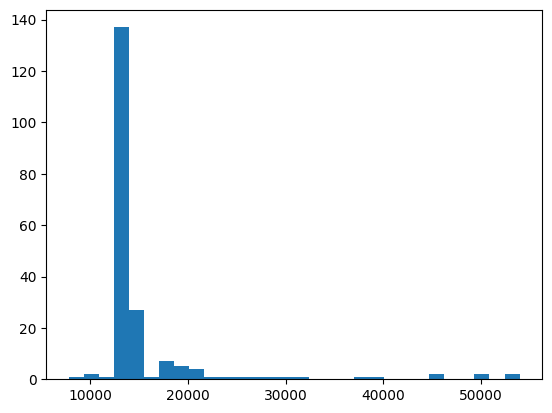

In [17]:
obs, _ = env.reset()
done = False
truncated = False
total_reward = 0
all_rewards = []
last_state = None
while not done and not truncated:
    action, last_state = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    all_rewards.append(reward)
    print(f"Action taken: {action}, Reward received: {reward}")

print(f"Total reward: {total_reward}")
import matplotlib.pyplot as plt
plt.hist(all_rewards, bins=30)  # Increased the number of bins for better granularity
plt.show()